In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [3]:
data = pd.read_csv("Case_study_CarPrice_Assignment.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
data['cylindernumber'].unique()

array([ 4.,  6.,  5.,  3., 12.,  2.,  8.])

In [6]:
data['doornumber'].unique()

array([2., 4.])

In [8]:
num = ['two','three','four','five','six','eight','twelve']
num1 = [2,3,4,5,6,8,12]
data['cylindernumber'].replace(num, num1, inplace=True)
data['cylindernumber'] = data['cylindernumber'].astype(float)
data['doornumber'].replace(num, num1, inplace=True)
data['doornumber'] = data['doornumber'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    float64
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    float64
 16  enginesize        205 non-null    int64  
 1

In [10]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [11]:
data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
doornumber,205.0,3.121951,0.994966,2.00,2.00,4.00,4.00,4.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
cylindernumber,205.0,4.380488,1.080854,2.00,4.00,4.00,4.00,12.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00


In [13]:
car_brand = data["CarName"].str.split(" ", expand=True)
data['CarBrand'] = car_brand[0]
data['CarBrand'].dtype

dtype('O')

In [14]:
car_brand = ['maxda','Nissan','porcshce','toyouta','vokswagen','vw']
car_fix = ['mazda','nissan','porsche','toyota','volkswagen','volkswagen']
data['CarBrand'].replace(car_brand, car_fix, inplace=True)
data['CarBrand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

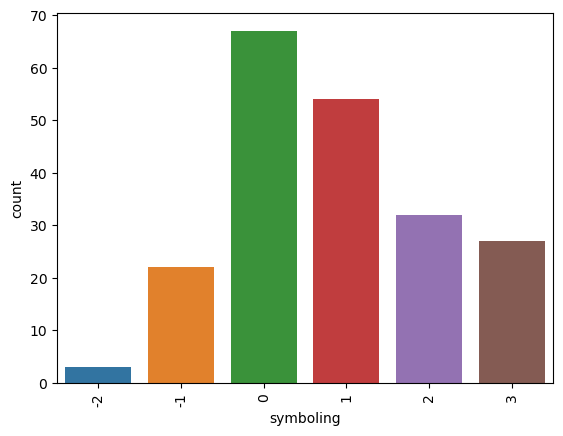

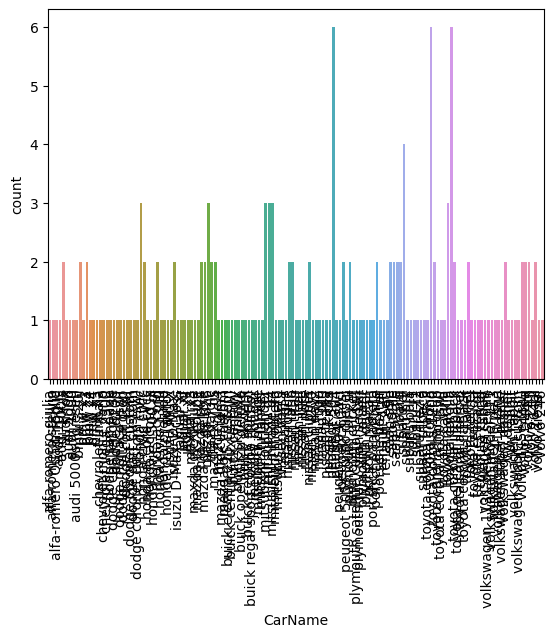

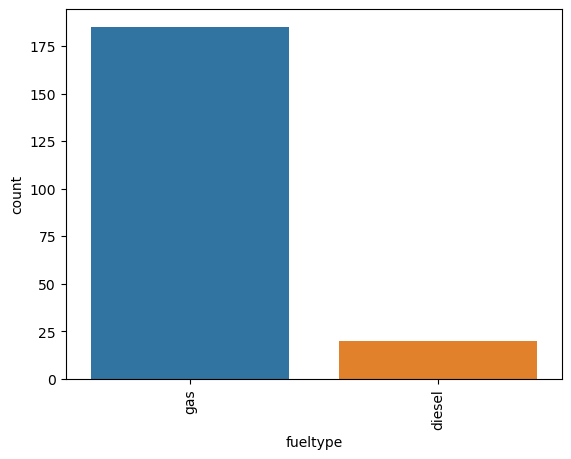

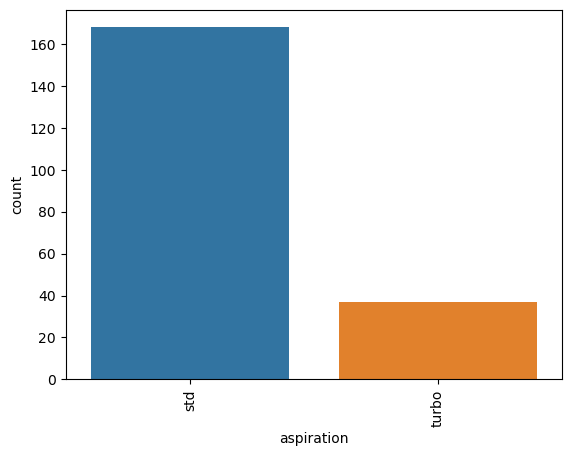

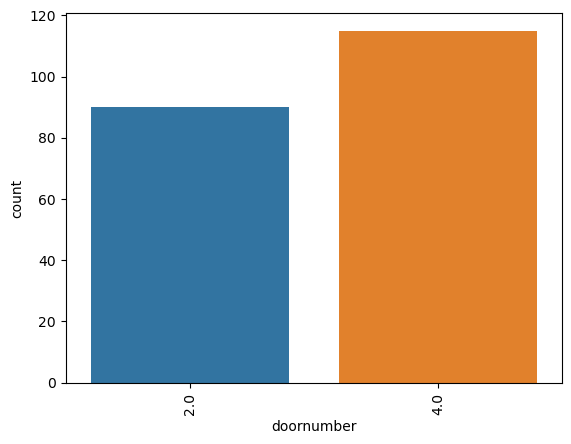

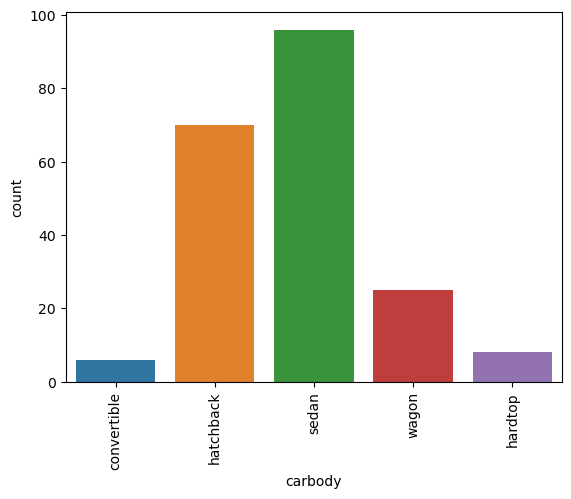

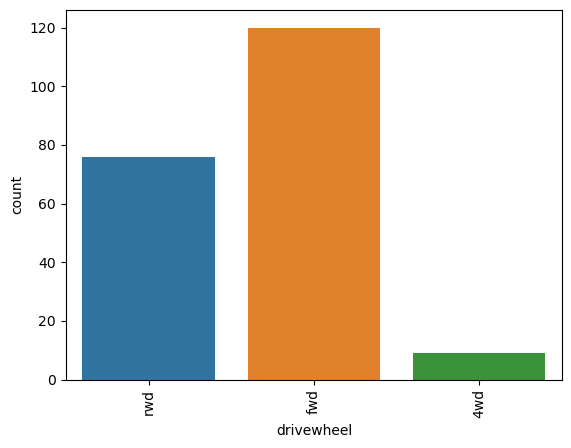

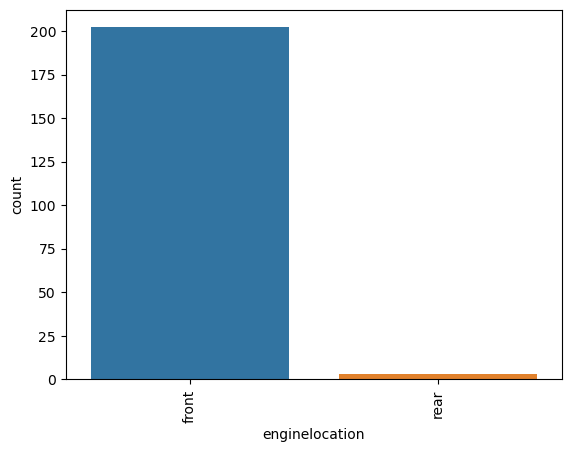

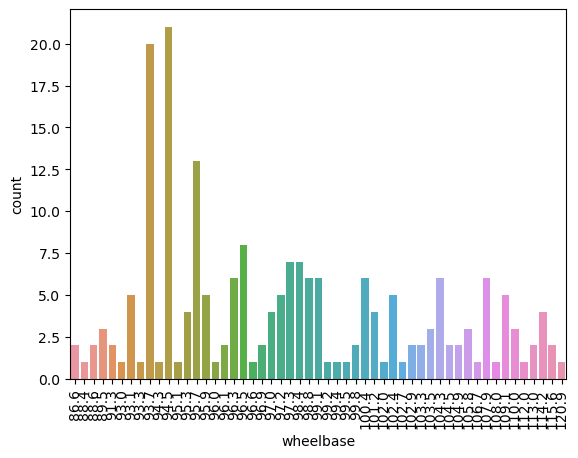

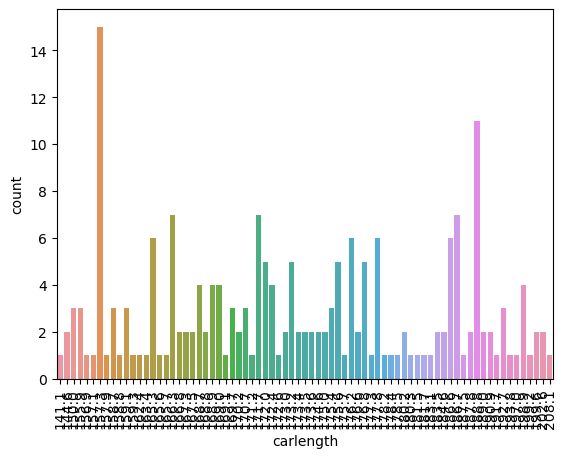

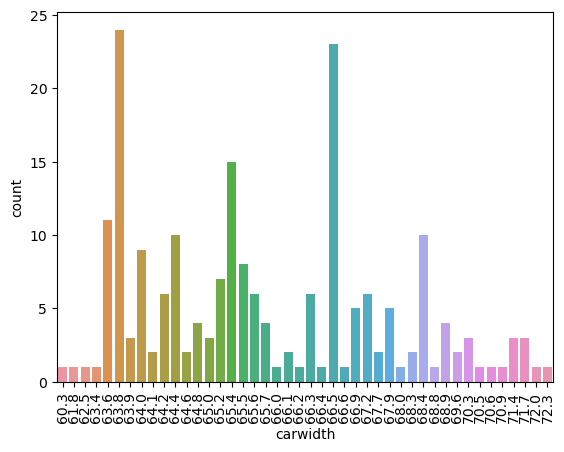

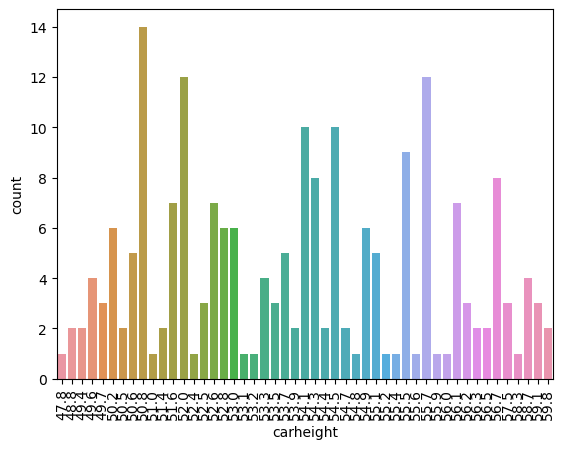

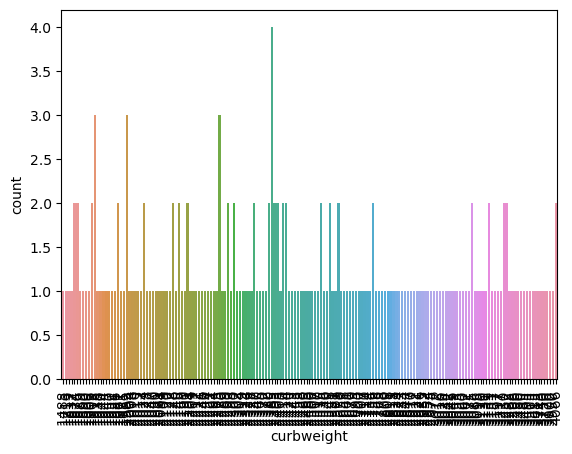

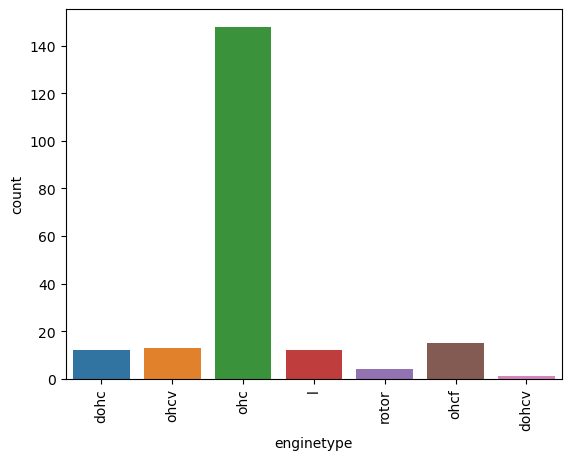

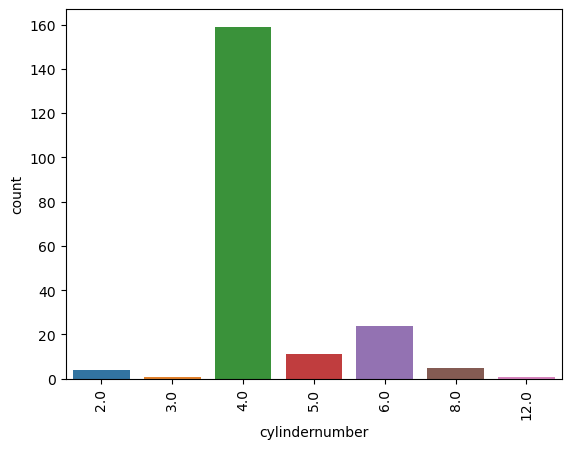

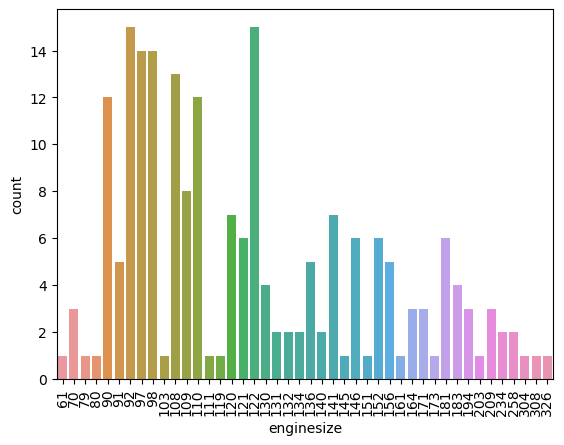

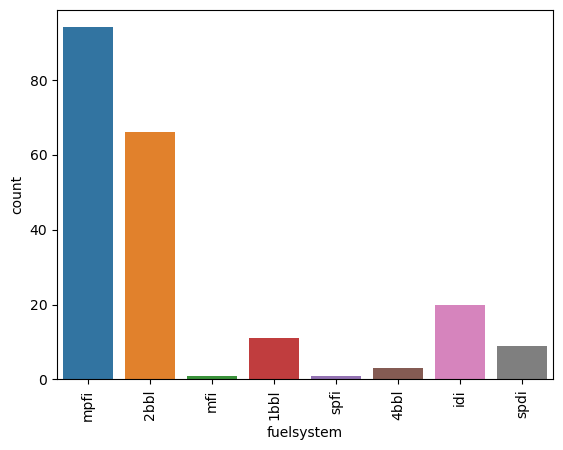

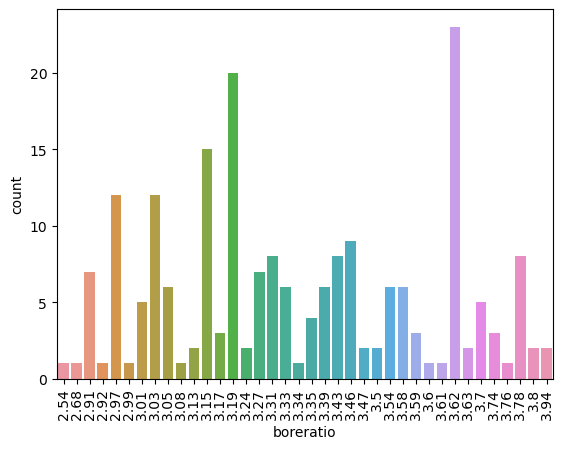

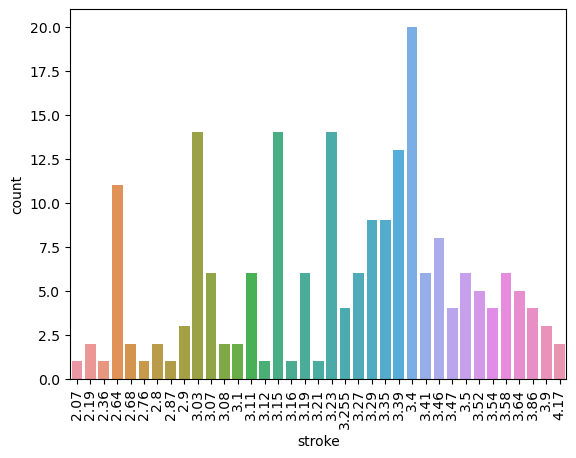

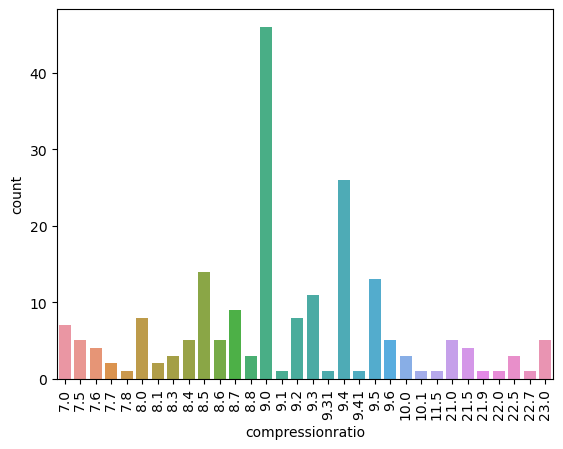

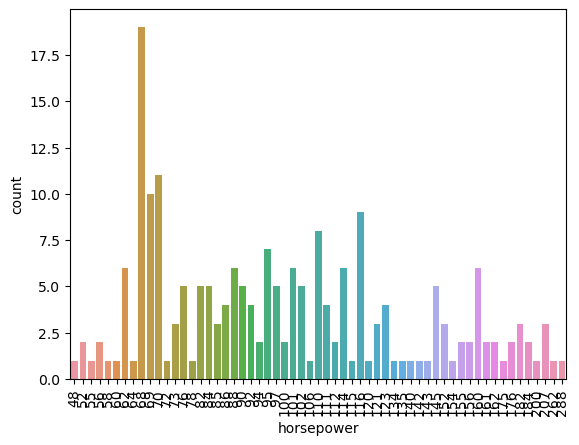

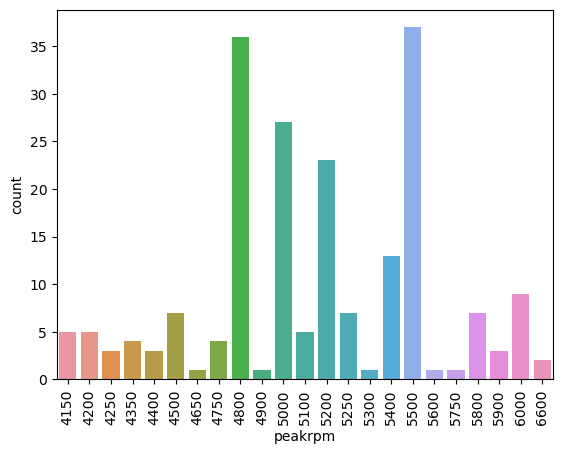

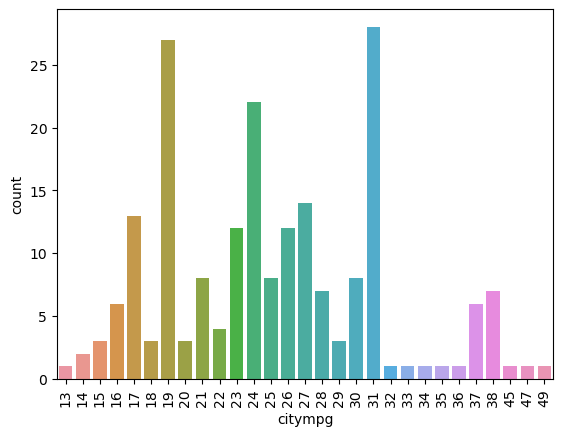

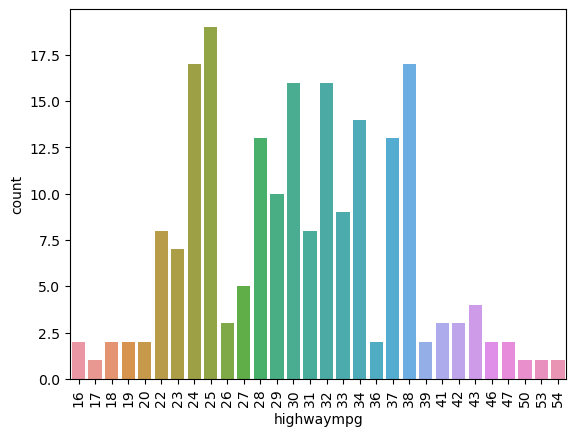

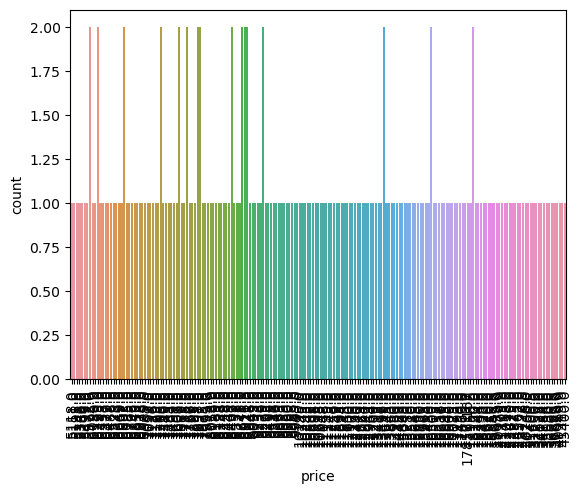

In [15]:
#Tan so:
col = data.iloc[:,1:-1].columns
for i in col:
    bar_plot = sns.countplot(x = i, data = data )
    plt.xticks(rotation = 90)
    plt.show()

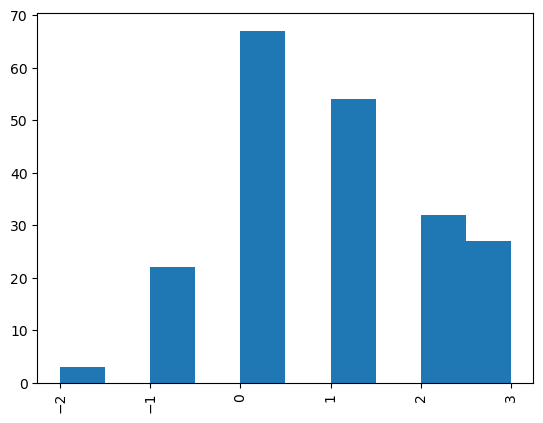

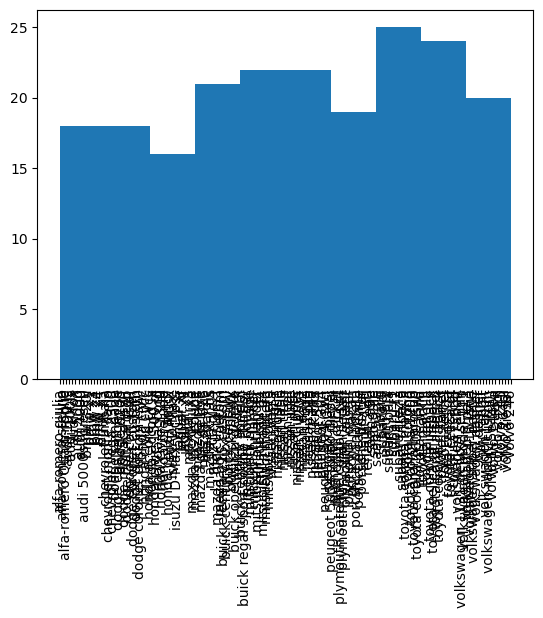

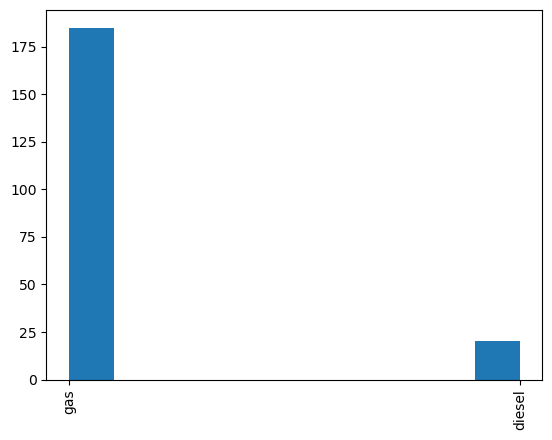

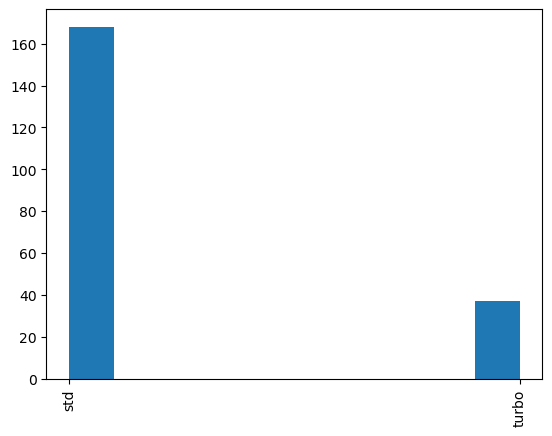

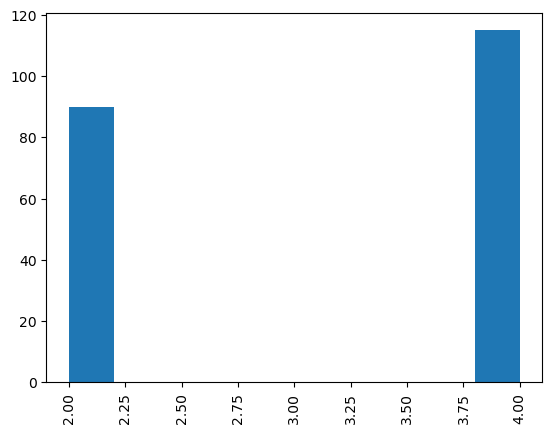

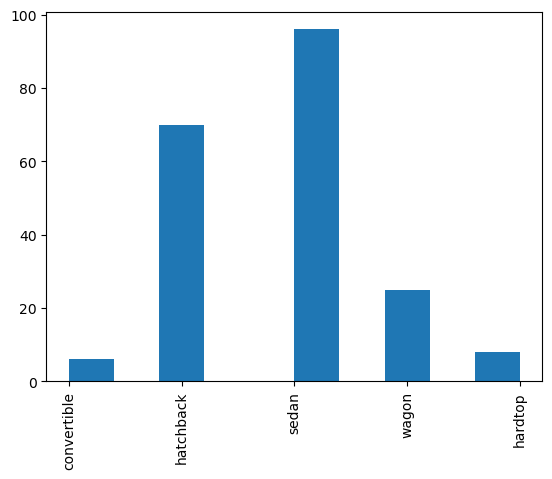

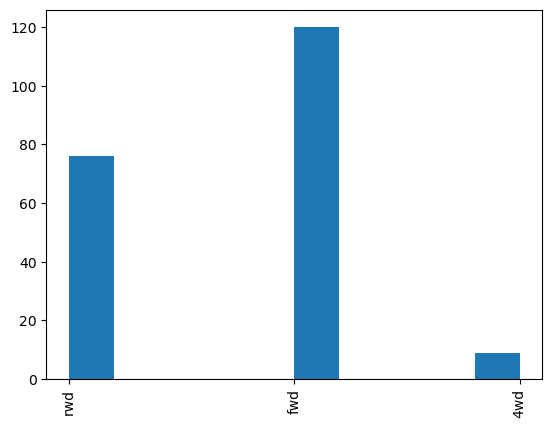

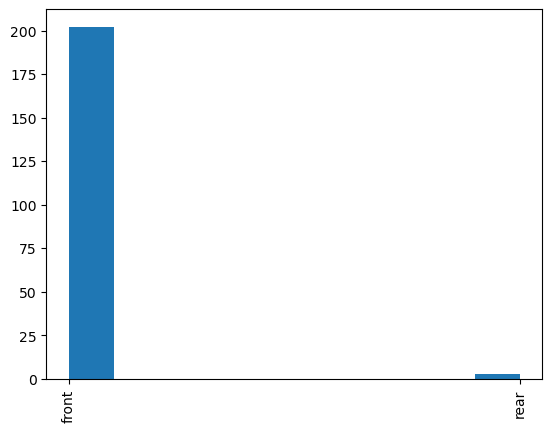

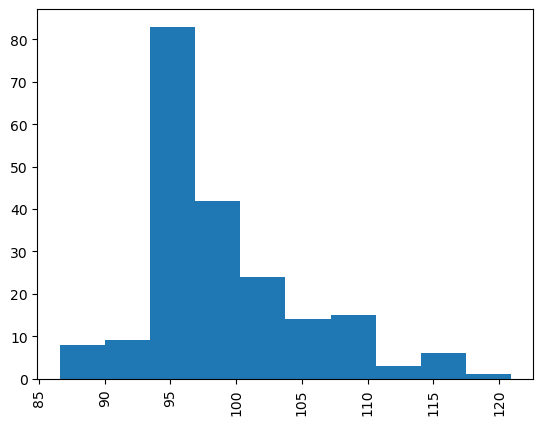

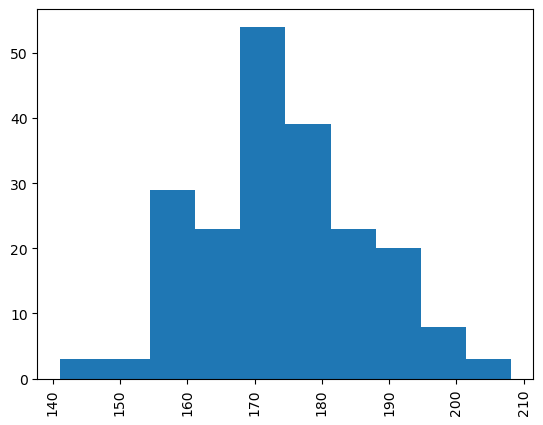

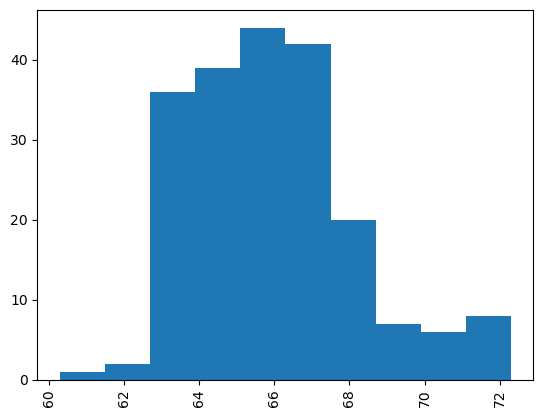

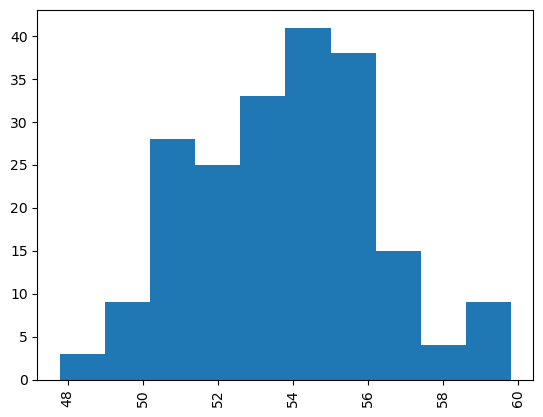

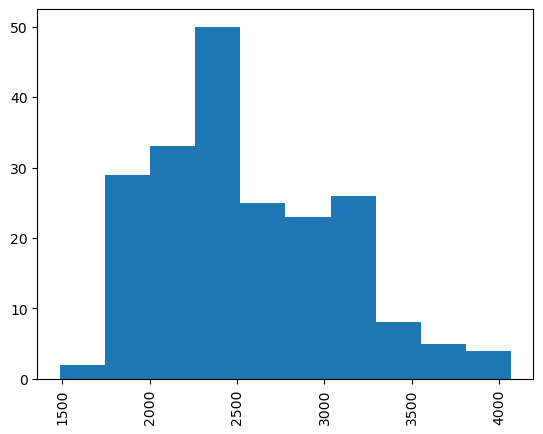

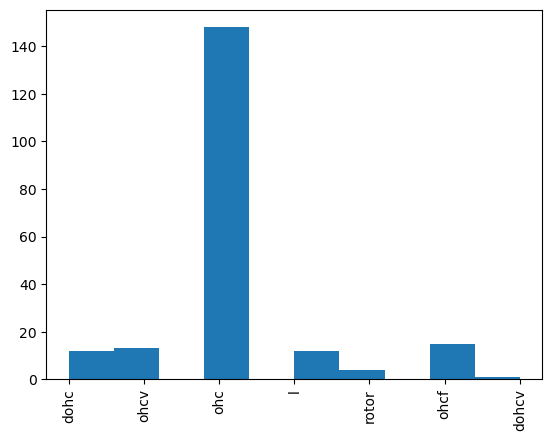

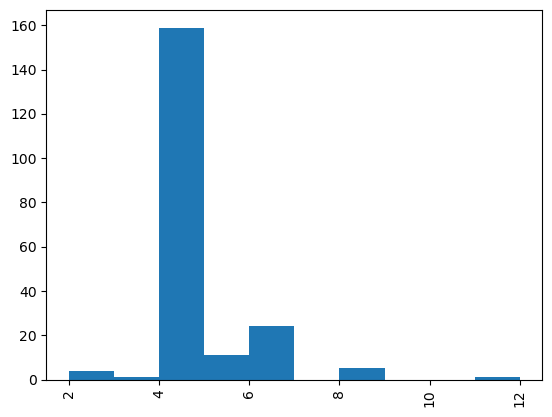

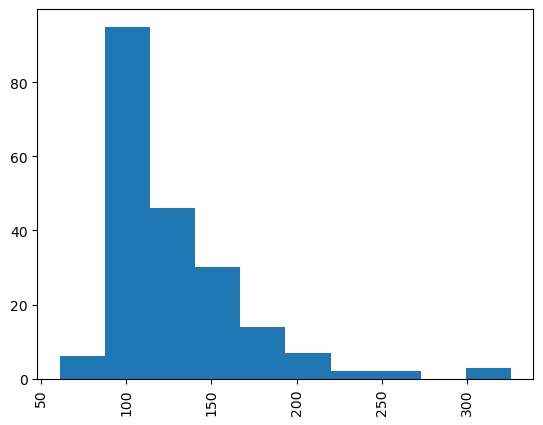

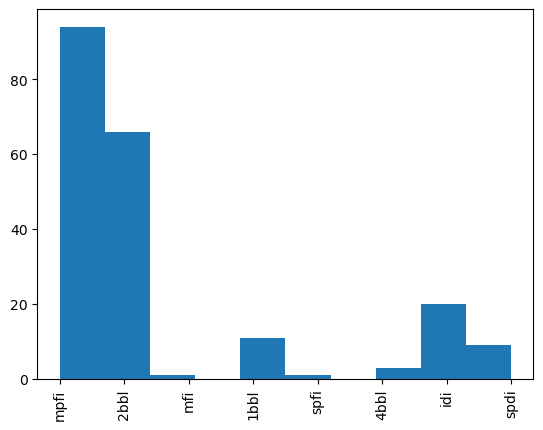

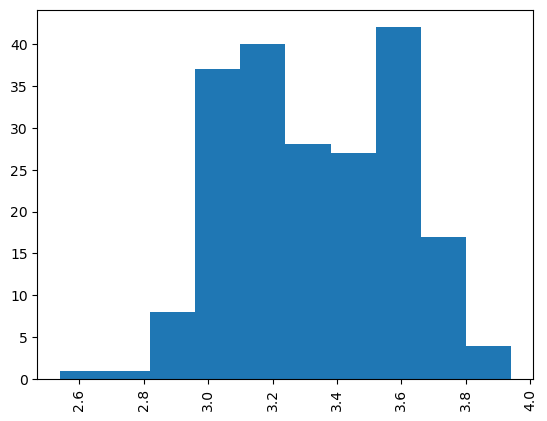

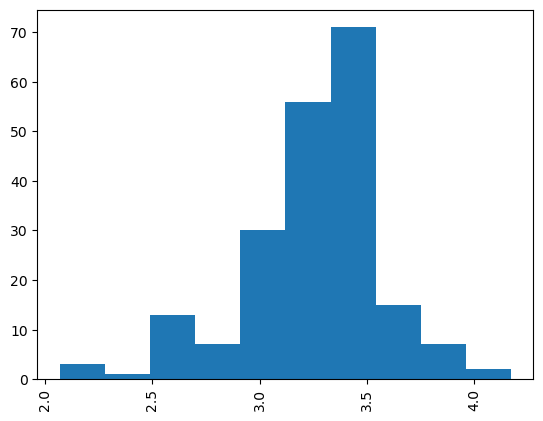

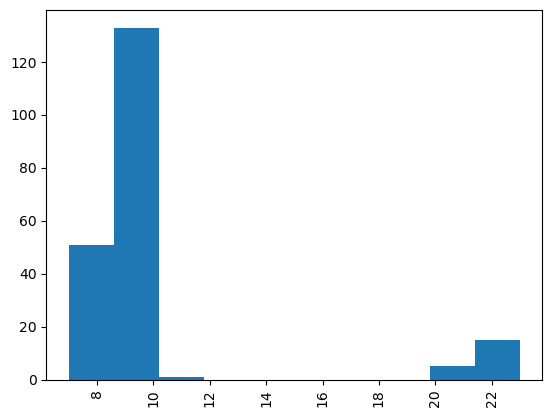

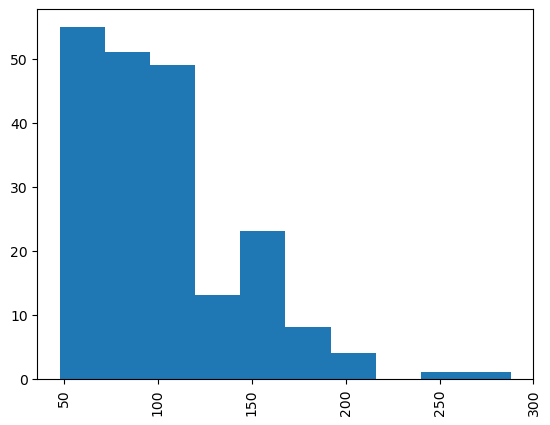

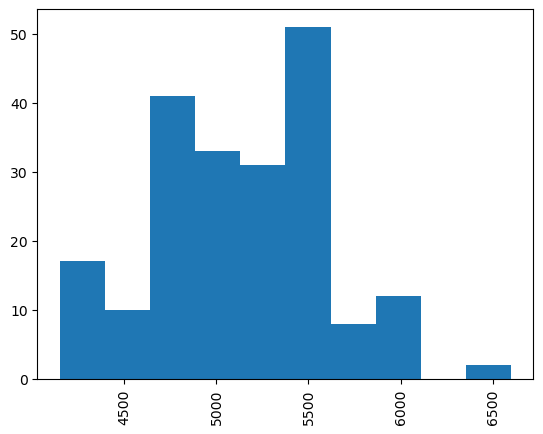

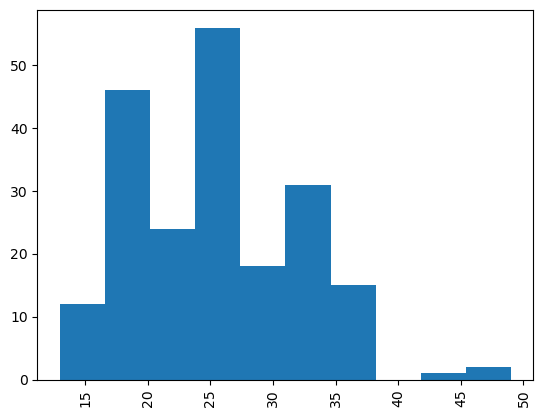

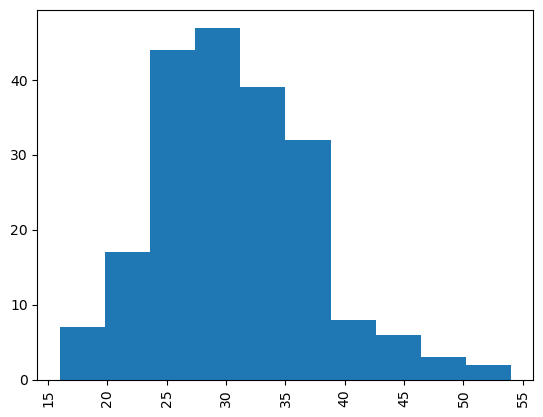

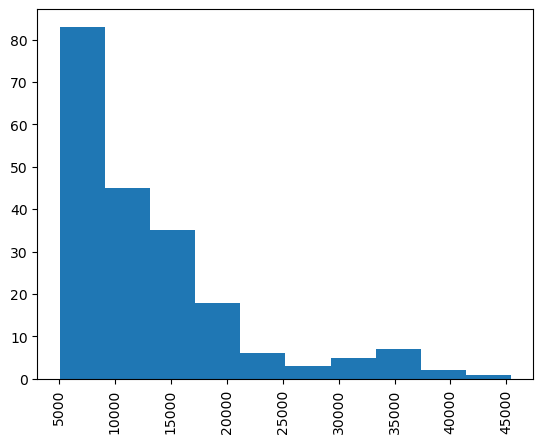

In [16]:
#Tan suat
for i in col:
    plt.hist(data[i])
    plt.xticks(rotation = 90)
    plt.show()

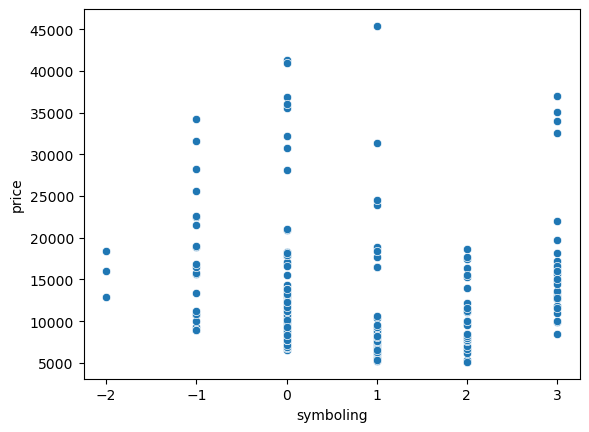

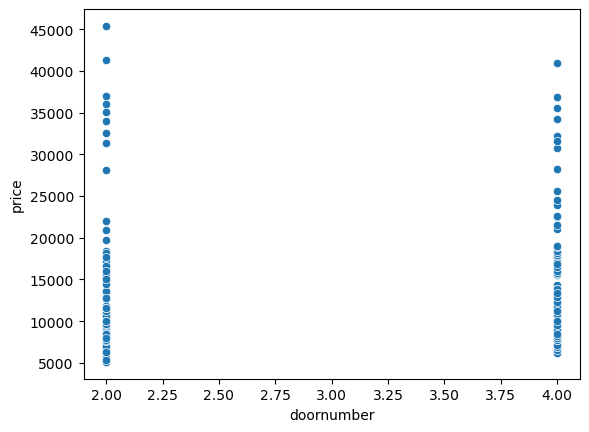

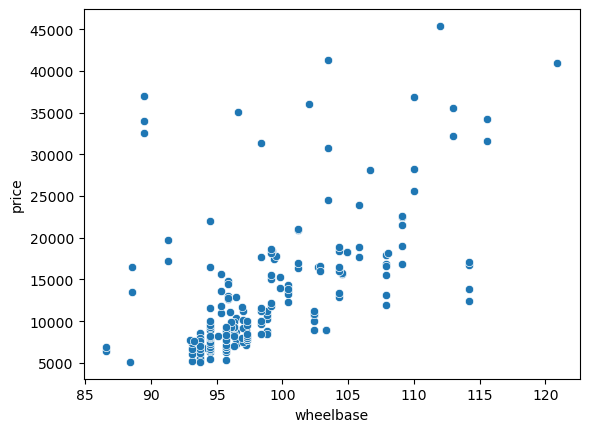

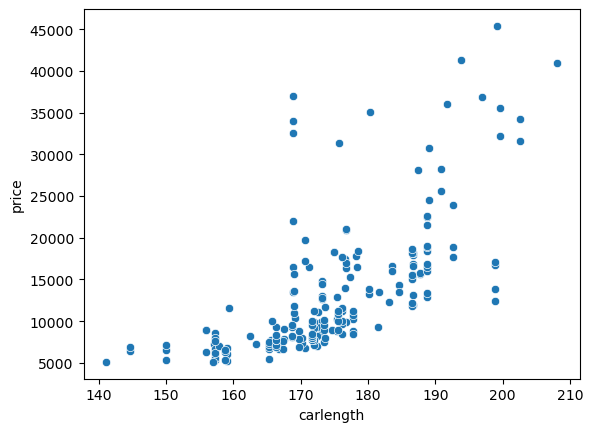

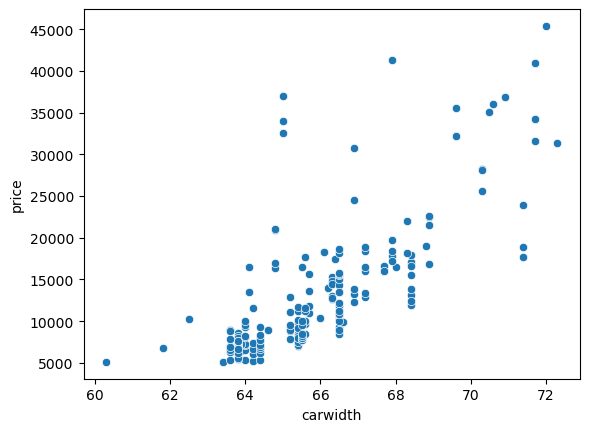

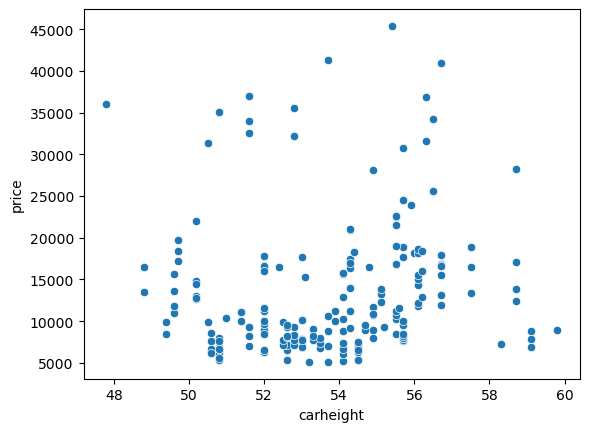

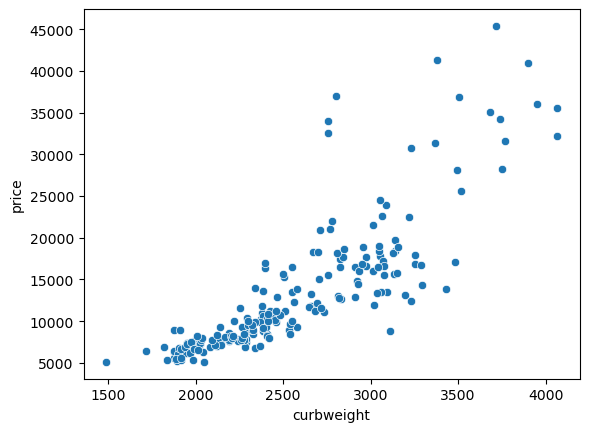

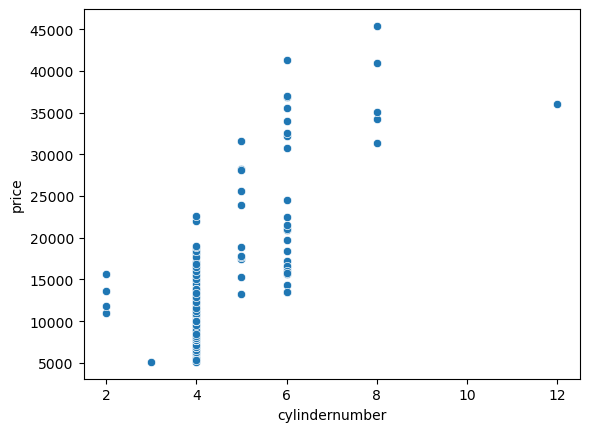

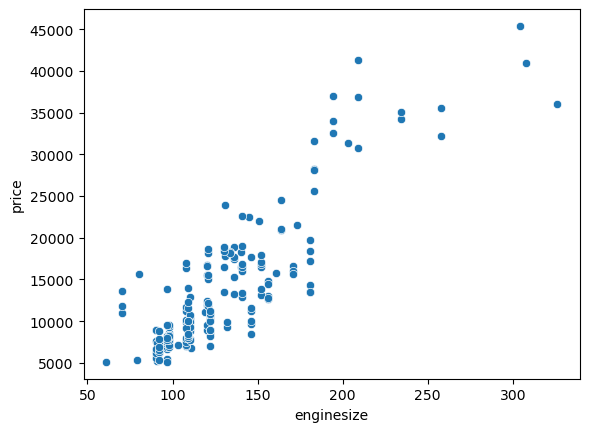

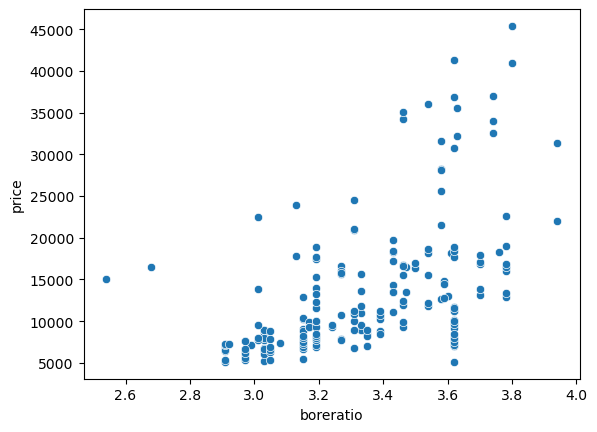

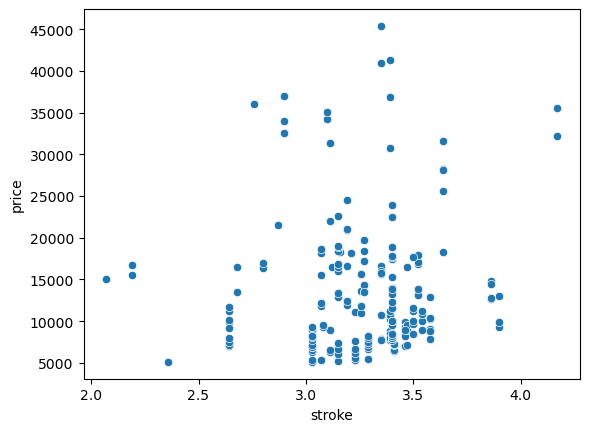

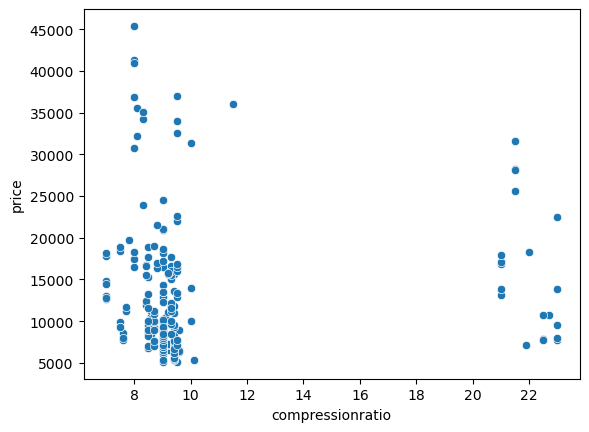

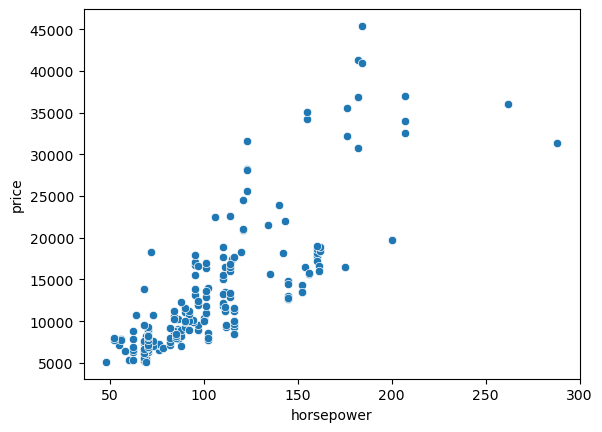

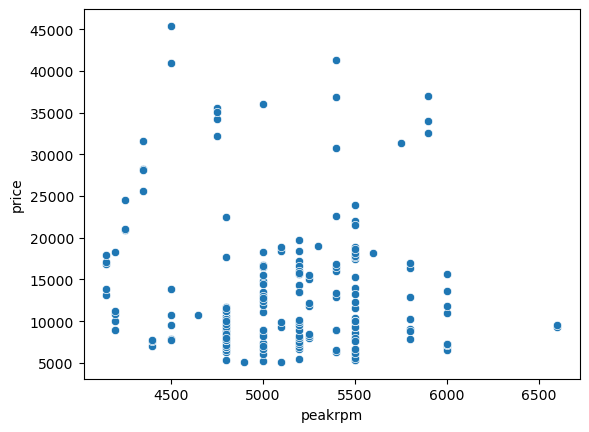

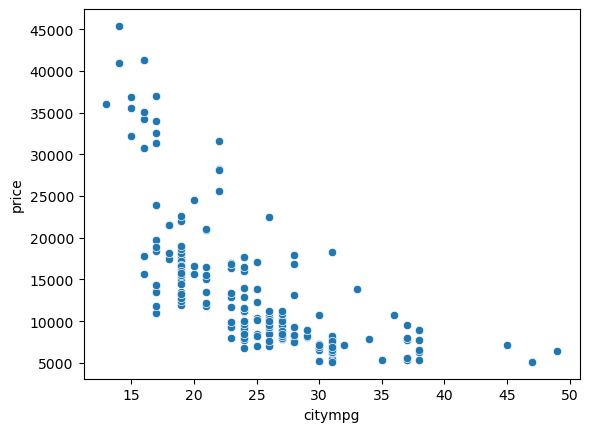

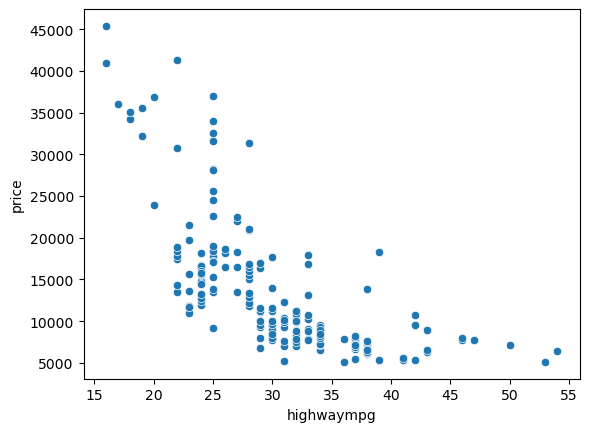

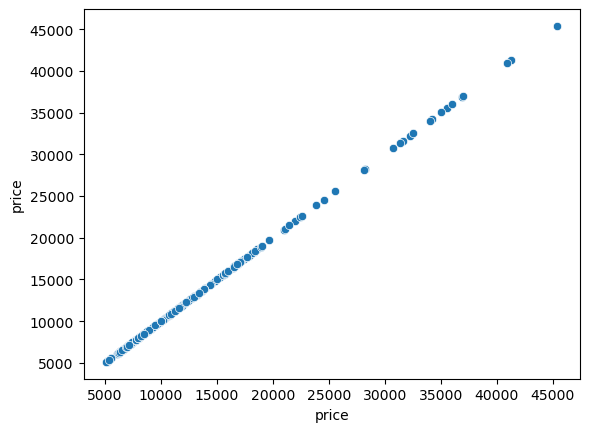

In [17]:
#Tiến hành phân tích mối liên hệ của từng thuộc tính với price bằng các biểu đồ mô tảtần số, tần suất, các phép kiểm định
#dinh luong
for col1 in data.iloc[:,1:-1].select_dtypes(['int','float']).columns:
    sns.scatterplot(x = col1 , y = 'price', data = data)
    plt.show()

In [18]:
#Tiến hành phân tích mối liên hệ của từng thuộc tính với price bằng các biểu đồ mô tả tần số, tần suất, các phép kiểm định
dinh_luong = data.iloc[:,1:-1].select_dtypes(['int','float']).columns
for i in dinh_luong:
    r, p_value = stats.pearsonr(data[i],data['price'])
    if p_value < 0.05:
        print(f'Thuoc tinh {i} va price co tuong quan voi gia tri r = {r}, p_value = {p_value}')

Thuoc tinh wheelbase va price co tuong quan voi gia tri r = 0.57781559829215, p_value = 1.1828204863378005e-19
Thuoc tinh carlength va price co tuong quan voi gia tri r = 0.6829200156779622, p_value = 1.6787066240746602e-29
Thuoc tinh carwidth va price co tuong quan voi gia tri r = 0.7593252997415114, p_value = 9.627437876120389e-40
Thuoc tinh curbweight va price co tuong quan voi gia tri r = 0.8353048793372966, p_value = 1.2144448264032206e-54
Thuoc tinh cylindernumber va price co tuong quan voi gia tri r = 0.7183049020002833, p_value = 8.028863372444832e-34
Thuoc tinh enginesize va price co tuong quan voi gia tri r = 0.8741448025245117, p_value = 1.3547637598648421e-65
Thuoc tinh boreratio va price co tuong quan voi gia tri r = 0.5531732367984437, p_value = 7.907922278249421e-18
Thuoc tinh horsepower va price co tuong quan voi gia tri r = 0.8081388225362218, p_value = 1.483436573293965e-48
Thuoc tinh citympg va price co tuong quan voi gia tri r = -0.6857513360270397, p_value = 7.9786

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8952\988996422.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data['CarBrand'], rotation=90)


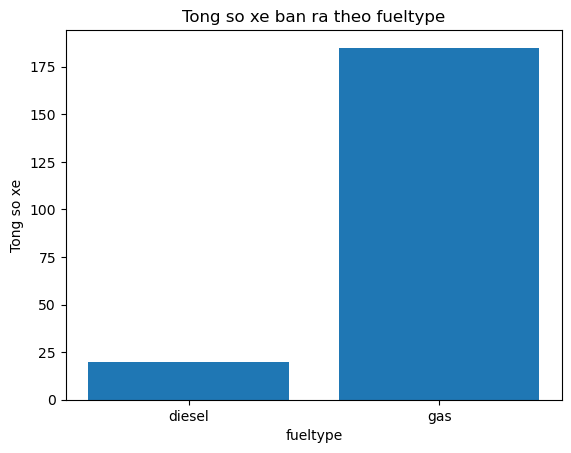

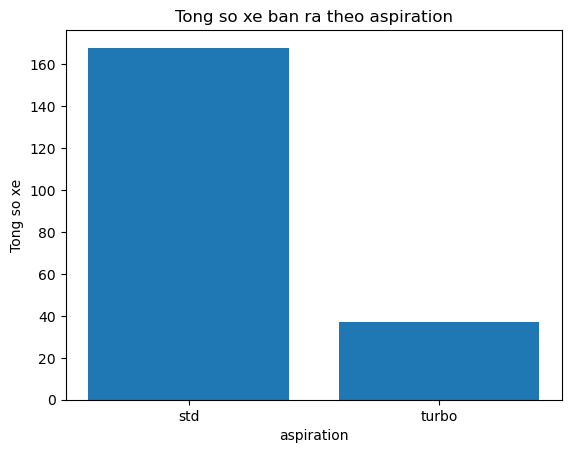

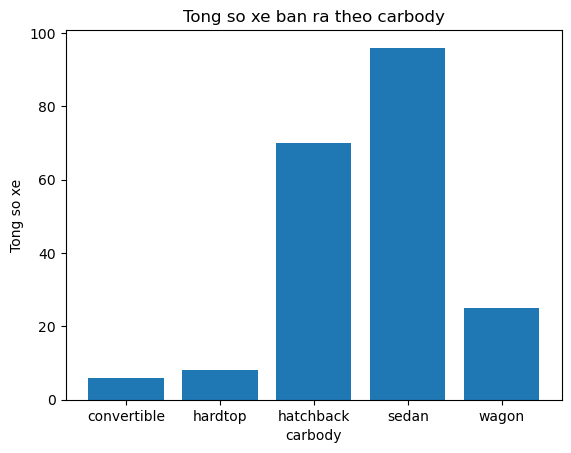

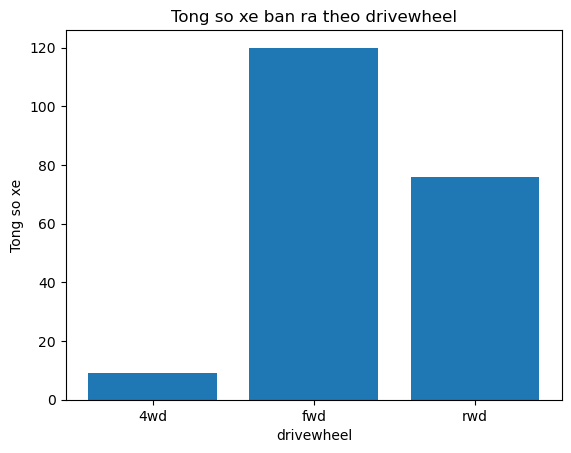

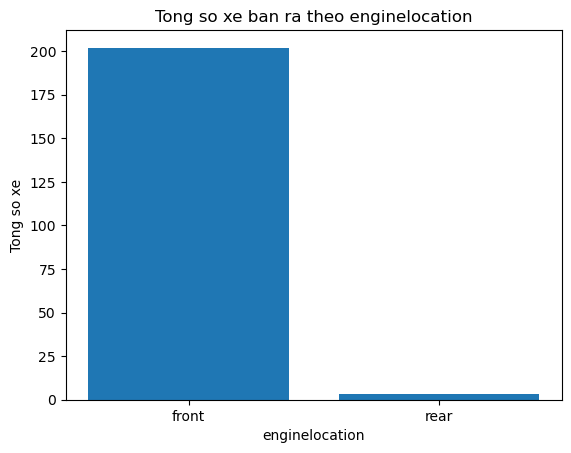

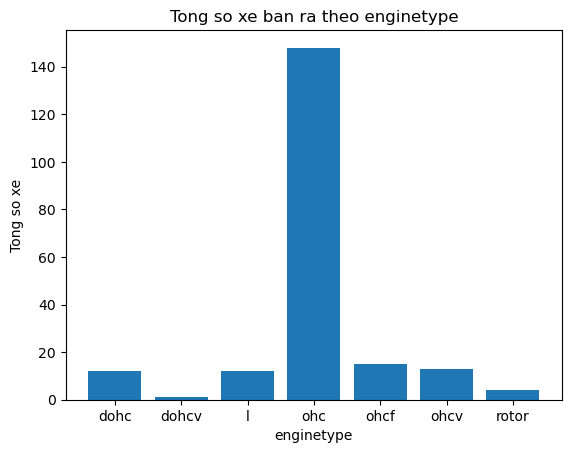

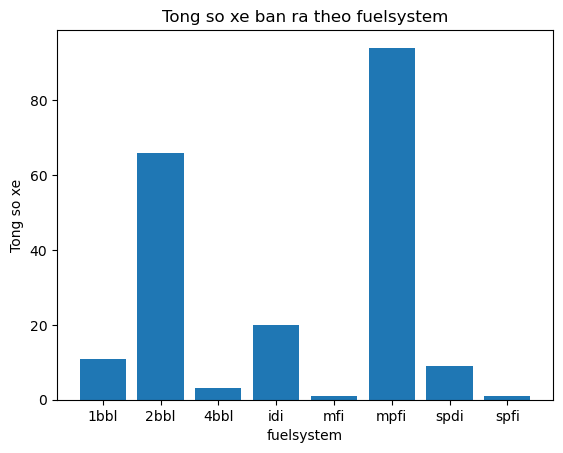

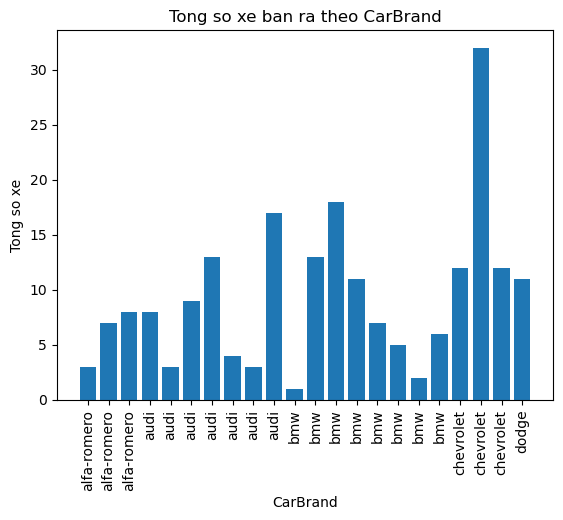

In [19]:
#dinh tinh:
dinh_tinh = data.iloc[:,3:].select_dtypes(['O']).columns
for i in dinh_tinh:
    df_count = data.groupby(data[i])['price'].count()
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Create a bar chart using ax.bar
    ax.bar(df_count.index, df_count.values)
    
    #set tiltle
    ax.set_title(f"Tong so xe ban ra theo {i}")

    # Set the x-axis labels
    ax.set_xlabel(f"{i}")


    # Set the y-axis labels
    ax.set_ylabel('Tong so xe')

    # Show the plot
ax.set_xticklabels(data['CarBrand'], rotation=90)
plt.show()
    
    

In [20]:
#heat-map":
data_heatmap = data[data.iloc[:,1:-1].select_dtypes(['int','float']).columns]
data_heatmap.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2.0,88.6,168.8,64.1,48.8,2548,4.0,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,2.0,88.6,168.8,64.1,48.8,2548,4.0,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2.0,94.5,171.2,65.5,52.4,2823,6.0,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4.0,99.8,176.6,66.2,54.3,2337,4.0,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4.0,99.4,176.6,66.4,54.3,2824,5.0,136,3.19,3.40,8.0,115,5500,18,22,17450.0


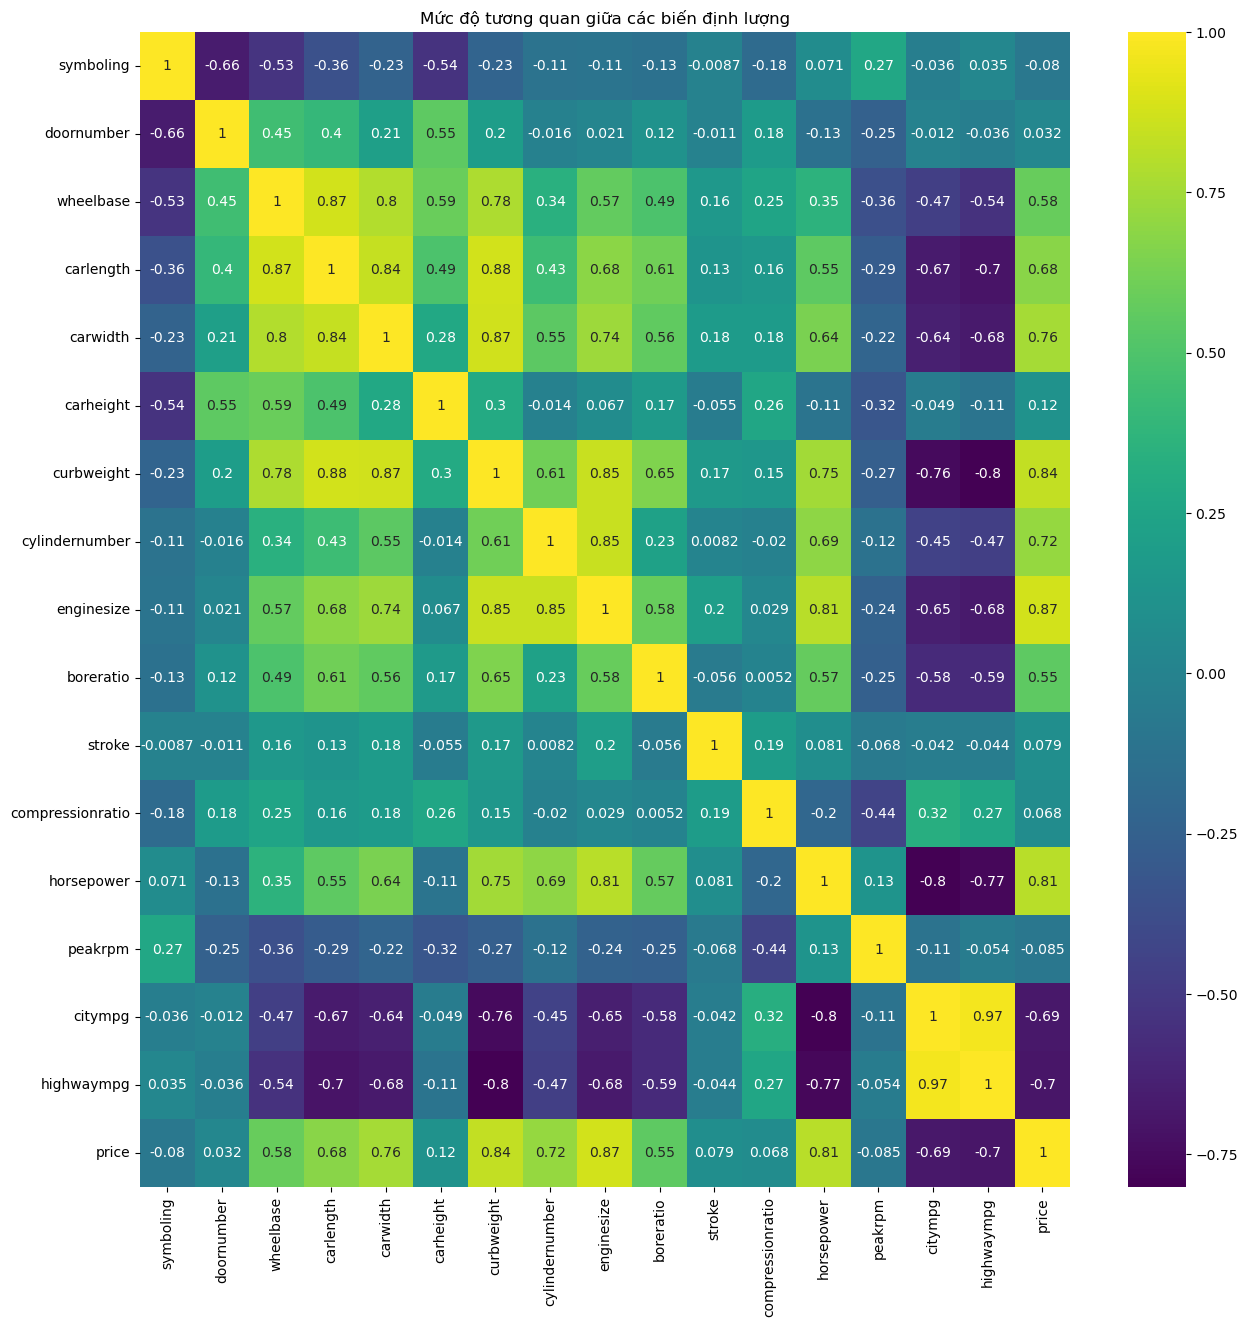

In [27]:
plt.figure(figsize=(15,15))
sns.heatmap(data_heatmap.corr(), annot=True, cmap='viridis')
plt.title("Mức độ tương quan giữa các biến định lượng", fontsize=12);

In [28]:
df_O = data.iloc[:,1:].select_dtypes(['O'])
df_O.head()

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,CarBrand
0,alfa-romero giulia,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,alfa-romero stelvio,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,audi 100 ls,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,audi 100ls,gas,std,sedan,4wd,front,ohc,mpfi,audi


In [31]:
encoder = OneHotEncoder()
oh_fueltype = encoder.fit_transform(data['fueltype'].values.reshape(-1,1))
oh_aspiration = encoder.fit_transform(data['aspiration'].values.reshape(-1,1))
oh_carbody = encoder.fit_transform(data['carbody'].values.reshape(-1,1))
oh_drivewheel = encoder.fit_transform(data['drivewheel'].values.reshape(-1,1))
oh_enginelocation = encoder.fit_transform(data['enginelocation'].values.reshape(-1,1))
oh_enginetype = encoder.fit_transform(data['enginetype'].values.reshape(-1,1))
oh_fuelsystem = encoder.fit_transform(data['fuelsystem'].values.reshape(-1,1))

In [32]:
pd.get_dummies(df_O, columns=['CarBrand'])

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,CarBrand_alfa-romero,CarBrand_audi,...,CarBrand_nissan,CarBrand_peugeot,CarBrand_plymouth,CarBrand_porsche,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_volkswagen,CarBrand_volvo
0,alfa-romero giulia,gas,std,convertible,rwd,front,dohc,mpfi,1,0,...,0,0,0,0,0,0,0,0,0,0
1,alfa-romero stelvio,gas,std,convertible,rwd,front,dohc,mpfi,1,0,...,0,0,0,0,0,0,0,0,0,0
2,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,ohcv,mpfi,1,0,...,0,0,0,0,0,0,0,0,0,0
3,audi 100 ls,gas,std,sedan,fwd,front,ohc,mpfi,0,1,...,0,0,0,0,0,0,0,0,0,0
4,audi 100ls,gas,std,sedan,4wd,front,ohc,mpfi,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,sedan,rwd,front,ohc,mpfi,0,0,...,0,0,0,0,0,0,0,0,0,1
201,volvo 144ea,gas,turbo,sedan,rwd,front,ohc,mpfi,0,0,...,0,0,0,0,0,0,0,0,0,1
202,volvo 244dl,gas,std,sedan,rwd,front,ohcv,mpfi,0,0,...,0,0,0,0,0,0,0,0,0,1
203,volvo 246,diesel,turbo,sedan,rwd,front,ohc,idi,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
## xay dung mo hinh
## feature selection:
df_fs = ['wheelbase','carlength','carwidth','curbweight','cylindernumber','enginesize','boreratio','horsepower','citympg','highwaympg','price']
df_fs = data[df_fs]
df_fs.head()

,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,88.6,168.8,64.1,2548,4.0,130,3.47,111,21,27,13495.0
1,88.6,168.8,64.1,2548,4.0,130,3.47,111,21,27,16500.0
2,94.5,171.2,65.5,2823,6.0,152,2.68,154,19,26,16500.0
3,99.8,176.6,66.2,2337,4.0,109,3.19,102,24,30,13950.0
4,99.4,176.6,66.4,2824,5.0,136,3.19,115,18,22,17450.0


In [34]:
X = df_fs.iloc[:,:-1].values.reshape(-1,10)
y = df_fs.iloc[:,-1]
X

array([[ 88.6, 168.8,  64.1, ..., 111. ,  21. ,  27. ],
       [ 88.6, 168.8,  64.1, ..., 111. ,  21. ,  27. ],
       [ 94.5, 171.2,  65.5, ..., 154. ,  19. ,  26. ],
       ...,
       [109.1, 188.8,  68.9, ..., 134. ,  18. ,  23. ],
       [109.1, 188.8,  68.9, ..., 106. ,  26. ,  27. ],
       [109.1, 188.8,  68.9, ..., 114. ,  19. ,  25. ]])

In [35]:
m_model = LinearRegression()
m_model.fit(X,y.ravel())

LinearRegression()

In [36]:
print(f'The linear model is: \n Y = {m_model.intercept_} +\
{m_model.coef_[0]}*X1 + {m_model.coef_[1]}*X2 + \
{m_model.coef_[2]}*X3 + {m_model.coef_[3]}*X4 + \
{m_model.coef_[4]}*X5 + {m_model.coef_[5]}*X6 + \
{m_model.coef_[6]}*X7 + {m_model.coef_[7]}*X8 + \
{m_model.coef_[8]}*X9 + {m_model.coef_[9]}*X10')

The linear model is: 
 Y = -42666.02076067298 +108.26001075898503*X1 + -57.36468730113571*X2 + 540.1054662922592*X3 + 2.831185034159421*X4 + -166.96750566107403*X5 + 88.25065408595313*X6 + -1379.3547001390482*X7 + 54.91206259835449*X8 + -111.66022323501768*X9 + 117.93262148897439*X10


In [37]:
wheelbase = float(input('Nhap chieu dai co so: '))
carlength = float(input('Nhap chieu dai xe: '))
carwidth = float(input('Nhap chieu rong xe: '))
curbweight = float(input('Nhap trong luong xe: '))
cylindernumber = float(input('Nhap so xi lanh trong xe: '))
enginesize = float(input('Nhap kich thuoc dong co: '))
boreratio = float(input('Nhap ti so hanh trinh: '))
horsepower = float(input('Nhap Ma luc: '))
citympg = float(input('số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trong thành phố: '))
highwaympg = float(input('số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trên đường cao tốc: '))
price = m_model.intercept_ + m_model.coef_[0]*wheelbase + m_model.coef_[1]*carlength + m_model.coef_[2]*carwidth + m_model.coef_[3]*curbweight + m_model.coef_[4]*cylindernumber + m_model.coef_[5]*enginesize + m_model.coef_[6]*boreratio + m_model.coef_[7]*horsepower + m_model.coef_[8]*citympg + m_model.coef_[9]*highwaympg
print('Gia xe hoi du doan la: ', price)


Nhap chieu dai co so: 


ValueError: could not convert string to float: ''

In [38]:
#danh gia chat luong mo hinh
X = df_fs.iloc[:,:-1].values.reshape(-1,10)
y = df_fs.iloc[:,-1]
exog = sm.add_constant(X)
estimator = sm.OLS(y,exog).fit()
print(estimator.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     89.83
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           2.98e-67
Time:                        19:32:11   Log-Likelihood:                -1955.3
No. Observations:                 205   AIC:                             3933.
Df Residuals:                     194   BIC:                             3969.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.267e+04   1.39e+04     -3.064      0.0

In [39]:
# khong co cylindernumber:
df_fs1 = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']
df_fs1 = data[df_fs1]
df_fs1.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0


In [40]:
X = df_fs1.iloc[:,:-1].values.reshape(-1,9)
y = df_fs1.iloc[:,-1]
X

array([[ 88.6, 168.8,  64.1, ..., 111. ,  21. ,  27. ],
       [ 88.6, 168.8,  64.1, ..., 111. ,  21. ,  27. ],
       [ 94.5, 171.2,  65.5, ..., 154. ,  19. ,  26. ],
       ...,
       [109.1, 188.8,  68.9, ..., 134. ,  18. ,  23. ],
       [109.1, 188.8,  68.9, ..., 106. ,  26. ,  27. ],
       [109.1, 188.8,  68.9, ..., 114. ,  19. ,  25. ]])

In [49]:
m_model = LinearRegression()
m_model.fit(X,y.ravel())

LinearRegression()

In [42]:
print(f'The linear model is: \n Y = {m_model.intercept_} +\
{m_model.coef_[0]}*X1 + {m_model.coef_[1]}*X2 + \
{m_model.coef_[2]}*X3 + {m_model.coef_[3]}*X4 + \
{m_model.coef_[4]}*X5 + {m_model.coef_[5]}*X6 + \
{m_model.coef_[6]}*X7 + {m_model.coef_[7]}*X8 + \
{m_model.coef_[8]}*X9')

The linear model is: 
 Y = -43223.92592864545 +109.89533077237468*X1 + -57.85338352199214*X2 + 532.4667092822485*X3 + 2.9177630148648053*X4 + 83.61504304565385*X5 + -1140.4636592689199*X6 + 53.75355146232132*X7 + -119.81462393211864*X8 + 122.85527103586962*X9


In [43]:
wheelbase = float(input('Nhap chieu dai co so: '))
carlength = float(input('Nhap chieu dai xe: '))
carwidth = float(input('Nhap chieu rong xe: '))
curbweight = float(input('Nhap trong luong xe: '))
enginesize = float(input('Nhap kich thuoc dong co: '))
boreratio = float(input('Nhap ti so hanh trinh: '))
horsepower = float(input('Nhap Ma luc: '))
citympg = float(input('số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trong thành phố: '))
highwaympg = float(input('số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trên đường cao tốc: '))
price = m_model.intercept_ + m_model.coef_[0]*wheelbase + m_model.coef_[1]*carlength + m_model.coef_[2]*carwidth + m_model.coef_[3]*curbweight + m_model.coef_[4]*enginesize + m_model.coef_[5]*boreratio + m_model.coef_[6]*horsepower + m_model.coef_[7]*citympg + m_model.coef_[8]*highwaympg
print('Gia xe hoi du doan la: ', price)

Nhap chieu dai co so: 


ValueError: could not convert string to float: ''

In [44]:
#danh gia chat luong mo hinh
X = df_fs1.iloc[:,:-1].values.reshape(-1,9)
y = df_fs1.iloc[:,-1]
exog = sm.add_constant(X)
estimator = sm.OLS(y,exog).fit()
print(estimator.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     100.3
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           3.01e-68
Time:                        19:32:23   Log-Likelihood:                -1955.4
No. Observations:                 205   AIC:                             3931.
Df Residuals:                     195   BIC:                             3964.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.322e+04   1.38e+04     -3.141      0.0

# Đánh giá chất lượng 2 mô hình dựa trên các thông số như R_square, Tổng bình phương sai số trung bình.

NameError: name 'X_test' is not defined

In [ ]:
# lưu trữ mô hình vào máy tính
import pickle # thư viện  giúp lưu trữ mô hình
CS = 'modelCaseStudy.sav'
pickle.dump(regressor80, open(CS, 'wb'))
#sử dụng mô hình
loaded_model = pickle.load(open(filename, 'rb'))
#tự chọn x 
y_pred = loaded_model.predict(x)
y_pred